In [1]:
import pandas as pd
import pickle

In [2]:
data = pd.DataFrame()
data = data.append(pd.read_csv("data/newresults.csv"))


In [3]:
data = data.drop("Unnamed: 0",axis=1)
data.to_csv("data/combined.csv")

In [19]:
data.columns

Index(['HiddenLayers', 'LearningRate', 'Optimizer', 'NumFilters', 'Activation',
       'KernelSize', 'Momentum', 'Epochs', 'Loss', 'Acc', 'Val_Loss',
       'Val_Acc'],
      dtype='object')

In [6]:
criterea = ['HiddenLayers', 'LearningRate', 'Optimizer', 'NumFilters', 'Activation', 'KernelSize', 'Momentum']

In [25]:
grouped_df = data.groupby(criterea)

group = None
groups = []
gD = dict()
goal = (32, .001, "RMSprop", 96, "relu", 3, 0.9)

for key,item in grouped_df:
    groups += [grouped_df.get_group(key)]
    gD[key] = grouped_df.get_group(key)[["Val_Acc", "Acc", "Val_Loss", "Loss", "Epochs"]].values
    if key == goal:
        group = grouped_df.get_group(key)

In [26]:
print(gD)

{(2, 0.001, 'Adam', 16, 'relu', 3, 0.9): array([[ 0.12947658,  0.08783501,  2.84013176,  5.78159904,  1.        ],
       [ 0.1367393 ,  0.12518439,  2.81793261,  2.83856964,  2.        ],
       [ 0.13173053,  0.14205004,  2.85114098,  2.78808165,  3.        ],
       [ 0.13849236,  0.16968635,  2.85976577,  2.72869015,  4.        ],
       [ 0.18457301,  0.20553283,  2.75844193,  2.64427519,  5.        ],
       [ 0.20385675,  0.24594362,  2.66713476,  2.53693104,  6.        ],
       [ 0.18757826,  0.28103867,  2.62931085,  2.43220568,  7.        ],
       [ 0.2486852 ,  0.30046478,  2.48323202,  2.36329126,  8.        ],
       [ 0.30177811,  0.31184772,  2.31311679,  2.30799365,  9.        ],
       [ 0.30653644,  0.32540146,  2.31938124,  2.26134849, 10.        ],
       [ 0.35061356,  0.3354485 ,  2.1936481 ,  2.2268362 , 11.        ],
       [ 0.35111445,  0.34221146,  2.21555305,  2.20097423, 12.        ],
       [ 0.37340346,  0.35167405,  2.13997722,  2.16867876, 13.        

In [27]:
pickle.dump(gD, open("resnet_gridsearch.pickle", "wb"))

In [22]:
print(pickle.load(open("resnet_gridsearch.pickle", "rb")))

{(2, 0.001, 'Adam', 16, 'relu', 3, 0.9):        Val_Acc       Acc  Val_Loss      Loss  Epochs
4500  0.129477  0.087835  2.840132  5.781599       1
4501  0.136739  0.125184  2.817933  2.838570       2
4502  0.131731  0.142050  2.851141  2.788082       3
4503  0.138492  0.169686  2.859766  2.728690       4
4504  0.184573  0.205533  2.758442  2.644275       5
...        ...       ...       ...       ...     ...
4570  0.597546  0.600790  1.414309  1.384267      71
4571  0.608315  0.605243  1.398037  1.370873      72
4572  0.592787  0.605494  1.416455  1.369535      73
4573  0.593539  0.607442  1.446665  1.369328      74
4574  0.600551  0.606496  1.409029  1.359501      75

[75 rows x 5 columns], (2, 0.001, 'Adam', 32, 'relu', 3, 0.9):        Val_Acc       Acc  Val_Loss      Loss  Epochs
4575  0.132983  0.100470  2.890005  3.802228       1
4576  0.210368  0.151874  2.827224  2.801043       2
4577  0.189582  0.249423  2.715646  2.582615       3
4578  0.312547  0.299463  2.557901  2.394466   

In [53]:
group.to_csv("bestjob.csv")

['HiddenLayers', 'LearningRate', 'Optimizer', 'NumFilters', 'Activation', 'KernelSize', 'Momentum']


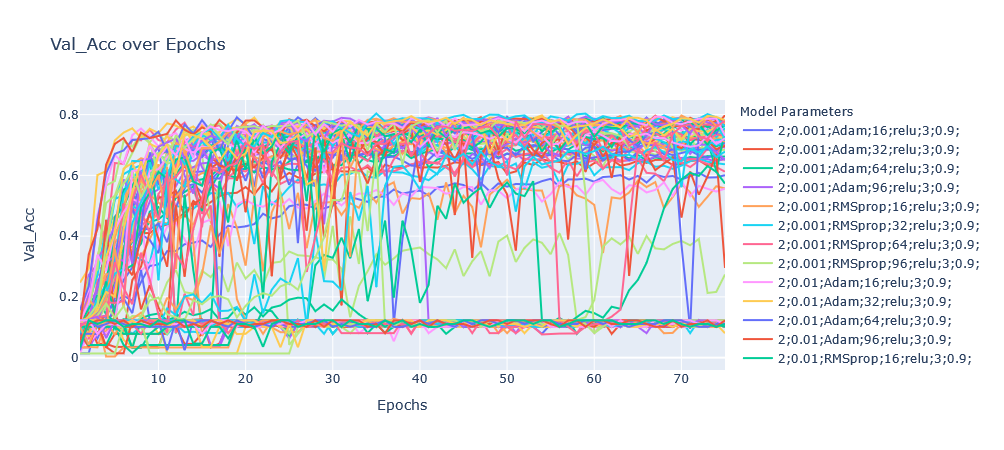

In [7]:
import plotly.graph_objects as go

fig = go.Figure()

x_l = "Epochs"
y_l = "Val_Acc"

for g in groups:
    x = g[x_l]
    y = g[y_l]
    label = "".join([str(g[i].unique()[0]) + ";" for i in criterea])
    fig.add_trace(go.Scatter(x=x, y=y,
                        mode='lines',
                        hovertemplate=f"{y_l}: %{{y:.2%}}<br>"+
                        f"{x_l}: %{{x:.2}}<br>"+
                        "".join([f"{str(i)}: {g[i].unique()[0]}" + "<br>" for i in criterea]),
                        name=label))
print(criterea)

fig.update_layout(
    title=f"{y_l} over {x_l}",
    xaxis_title=x_l,
    yaxis_title=y_l,
    legend_title="Model Parameters",
)

fig.show()

In [42]:
def genFig(y_l, y_scale="linear", y_format=""):
    fig = go.Figure()

    x_l = "Epochs"

    for g in groups:
        x = g[x_l]
        y = g[y_l]
        label = "".join([str(g[i].unique()[0]) + ";" for i in criterea])
        fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            hovertemplate=f"{y_l}: %{{y:{y_format}}}<br>"+
                            f"{x_l}: %{{x:.2}}<br>"+
                            "".join([f"{str(i)}: {g[i].unique()[0]}" + "<br>" for i in criterea]),
                            name=label))

    fig.update_layout(
        title=f"{y_l} over {x_l}",
        xaxis_title=x_l,
        yaxis_title=y_l,
        legend_title="Model Parameters",
    )

    fig.update_yaxes(type=y_scale)
    
    return fig

x = [genFig(*i) for i in [["Val_Acc", "linear", ".2%"], ["Acc", "linear", ".2%"], ["Loss", "log"], ["Val_Loss", "log"]]]

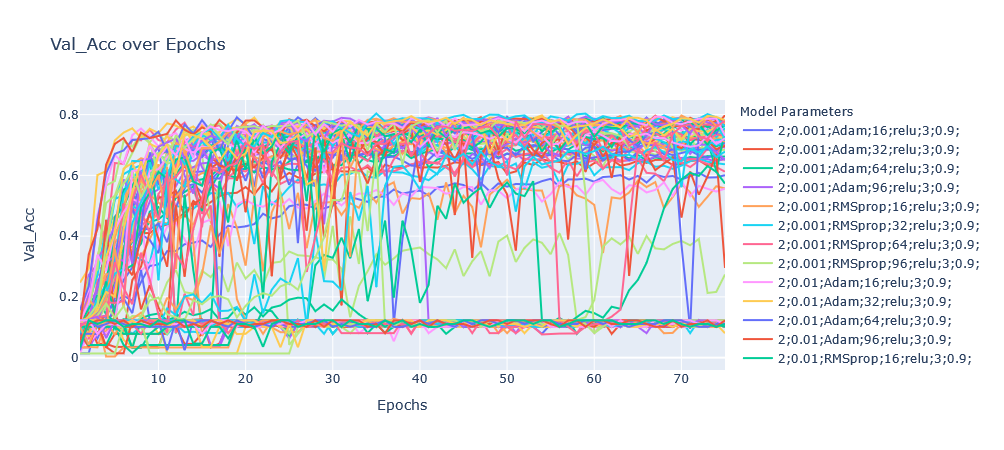

In [48]:
list(x)[0]

In [ ]:
data[data[""]]

['HiddenLayers', 'LearningRate', 'Optimizer', 'NumFilters', 'Activation', 'KernelSize', 'Momentum']


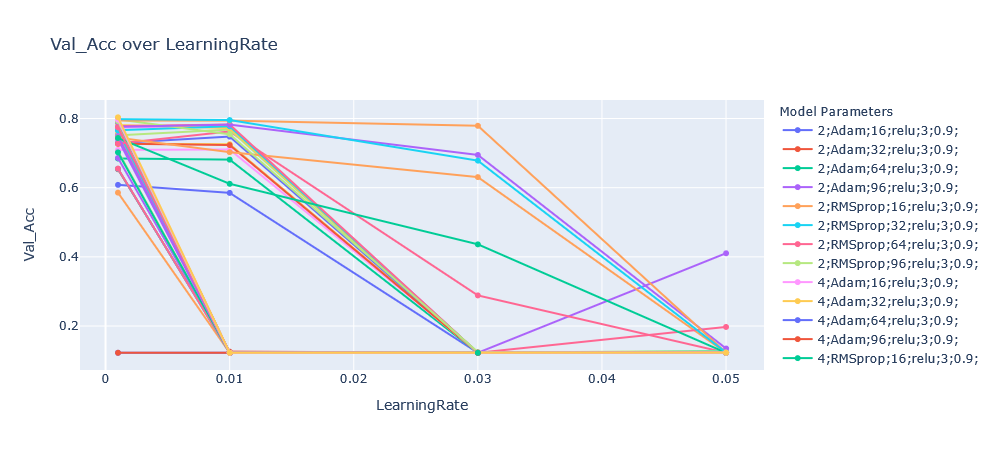

In [56]:
vary = "LearningRate"

v_idx = criterea.index(vary)
sel_crit = criterea[:v_idx] + criterea[v_idx + 1:]
grouped_df = data.groupby(sel_crit)

sel_groups = []
for key,item in grouped_df:
    sel_groups += [grouped_df.get_group(key)]
        
fig = go.Figure()

x_l = vary
y_l = "Val_Acc"

for g in sel_groups:
    x = list(g[x_l].unique())
    y = [max(g[g[x_l] == i][y_l]) for i in x]
    
    x, y = [list(i) for i in list(zip(*sorted(zip(x, y), key=lambda x: x[0])))]
    
    label = "".join([str(g[i].unique()[0]) + ";" for i in sel_crit])
    fig.add_trace(go.Scatter(x=x, y=y,
                        mode='lines+markers',
                        hovertemplate=f"{y_l}: %{{y:.2%}}<br>"+
                             f"{x_l}: %{{x:.2}}<br>"+
                             "".join([f"{str(i)}: {g[i].unique()[0]}" + "<br>" for i in sel_crit]),
                        name=label))
print(criterea)

fig.update_layout(
    title=f"{y_l} over {x_l}",
    xaxis_title=x_l,
    yaxis_title=y_l,
    legend_title="Model Parameters",
)

fig.show()

['HiddenLayers', 'LearningRate', 'Optimizer', 'NumFilters', 'Activation', 'KernelSize', 'Momentum']


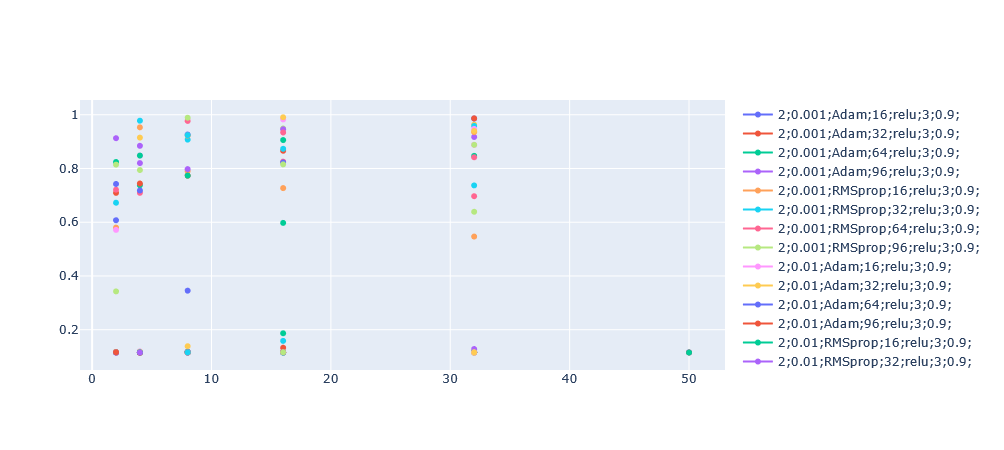

In [9]:
import plotly.graph_objects as go


fig = go.Figure()

for g in groups:
    x = g["HiddenLayers"]
    y = [max(g["Acc"])]
    label = "".join([str(g[i].unique()[0]) + ";" for i in criterea])
    fig.add_trace(go.Scatter(x=x, y=y,
                        mode='lines+markers',
                        name=label))
print(criterea)
fig.show()

['HiddenLayers', 'LearningRate', 'Optimizer', 'NumFilters', 'Activation', 'KernelSize', 'Momentum']


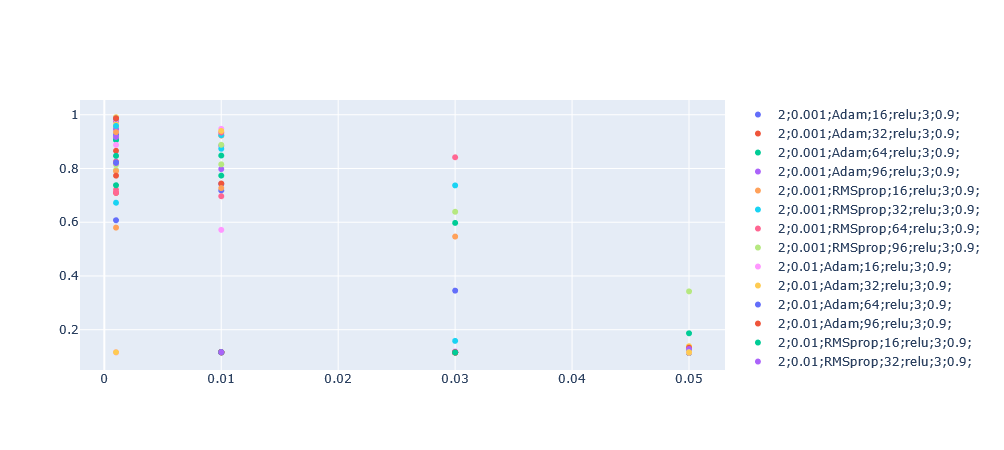

In [10]:
import plotly.graph_objects as go


fig = go.Figure()

for g in groups:
    x = g["LearningRate"]
    y = [max(g["Acc"])]
    label = "".join([str(g[i].unique()[0]) + ";" for i in criterea])
    fig.add_trace(go.Scatter(x=x, y=y,
                        mode='markers',
                        name=label))
print(criterea)
fig.show()

['HiddenLayers', 'LearningRate', 'Optimizer', 'NumFilters', 'Activation', 'KernelSize', 'Momentum']


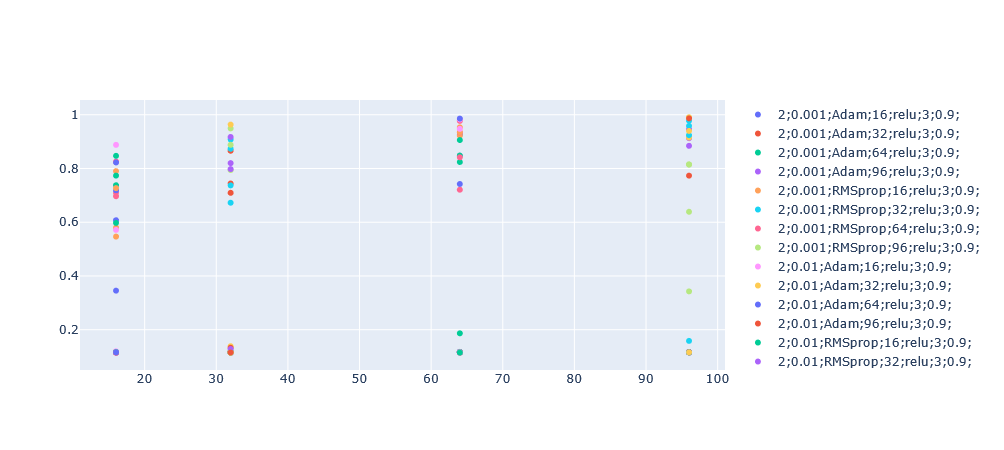

In [11]:
import plotly.graph_objects as go


fig = go.Figure()

for g in groups:
    x = g["NumFilters"]
    y = [max(g["Acc"])]
    label = "".join([str(g[i].unique()[0]) + ";" for i in criterea])
    fig.add_trace(go.Scatter(x=x, y=y,
                        mode='markers',
                        name=label))
print(criterea)
fig.show()

['HiddenLayers', 'LearningRate', 'Optimizer', 'NumFilters', 'Activation', 'KernelSize', 'Momentum']


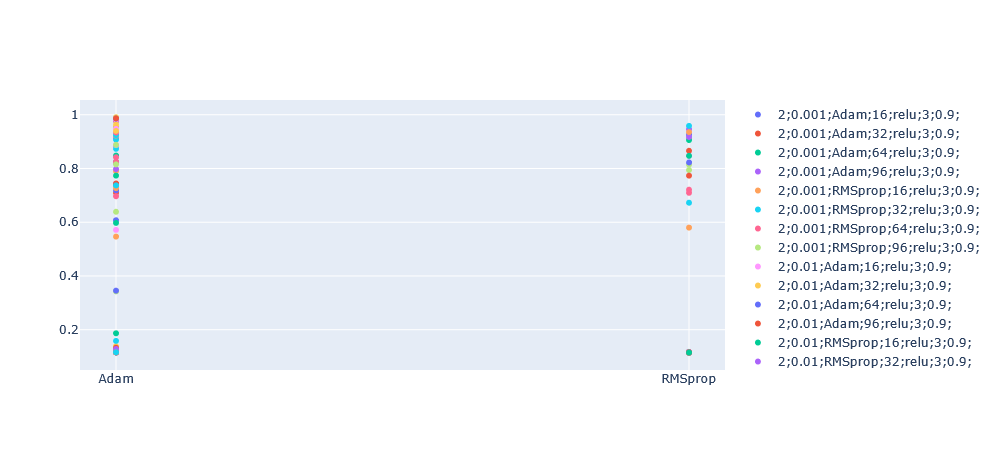

In [12]:
import plotly.graph_objects as go


fig = go.Figure()

for g in groups:
    x = g["Optimizer"]
    y = [max(g["Acc"])]
    label = "".join([str(g[i].unique()[0]) + ";" for i in criterea])
    fig.add_trace(go.Scatter(x=x, y=y,
                        mode='markers',
                        name=label))
print(criterea)
fig.show()